In [28]:
#importing pandas
#using magic function pylab for matplotlib and numpy
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\ASHISH GUSAIN\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
# since the file doesn't conatin any column names, we defne a list names
names=['sepal_length','sepal_width','petal_length','petal_width','flower_class']

In [42]:
#load data set and assign list names as the file header
iris=pd.read_csv('D:\iris.data',header=None,names=names)

# view data set
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,flower_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
# checking missing values in the data set
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
flower_class    0
dtype: int64

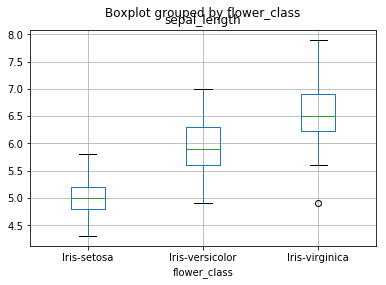

In [45]:
# doing a quick bivariate analysis between the variables- 
# 1. sepal length on flower class
# 2. sepal width on flower class 
# 3. petal length on flower class 
# 4. petal width on flower class 
iris.boxplot(column='sepal_length',by='flower_class')
# we get an inference that Iris virginca has the largest sepal length followed by Versicolor and then Setosa

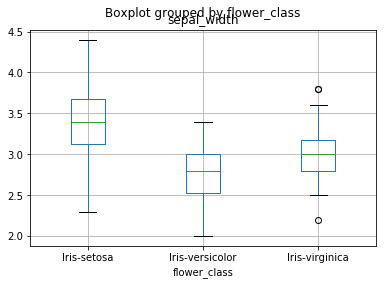

In [41]:
# 2.sepal width on flower class
iris.boxplot(column='sepal_width',by='flower_class')
# we get an inference that Iris Setosa has the largest sepal length followed by Virginca and then Versicolor

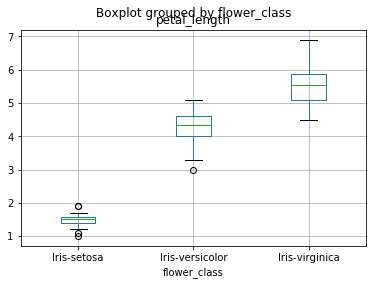

In [46]:
# 3. petal length on flower class 
iris.boxplot(column='petal_length',by='flower_class')
# we get an inference that Iris virginca has the largest petal length also followed by Versicolor and then Setosa

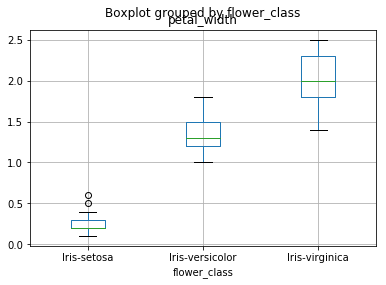

In [47]:
# 4. petal width on flower class 
iris.boxplot(column='petal_width',by='flower_class')
# we get an inference that Iris virginca has the largest petal width also followed by Versicolor and then Setosa

In [48]:
#  quick classification summary:
# We observe that setosas have small petals, versicolor have medium sized petals and virginica have the largest petals. 
# Furthermore, setosa seems to have shorter and wider sepals than the other flower classes .

# Also to note is that we dont have any significant outliers here

In [54]:
# import knn from scikit learn
from sklearn import neighbors
 
# Separating target variable and predictor variables as y and x respectively
x  =  iris.iloc[:,0:4]
y  =  iris['flower_class']


In [55]:
# calling and assigning the KNN model
clf = neighbors.KNeighborsClassifier()
# training the model
clf.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [58]:
# predicting the values
predict = clf.predict(x)
#check accuracy score
accuracy=clf.score(x,y)
print ("Predicted model accuracy: "+ str(accuracy))

Predicted model accuracy: 0.966666666667


In [60]:
# Add, predict to iris data frame as last column 'predicted class'
iris['predicted']=predict

In [62]:
# Compare two classes: actual and predicted
iris.iloc[:,4:6]

,flower_class,actual
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
5,Iris-setosa,Iris-setosa
6,Iris-setosa,Iris-setosa
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-setosa,Iris-setosa


In [65]:
# confusion matrix to validate the accuracy score
from sklearn.metrics import confusion_matrix
C=confusion_matrix(y,predict)
pd.DataFrame(C,index=['Predicted:setosa','Predicted:virginica','Predicted:versicolor'],columns=['Actual:setosa','Actual:virginica','Actual:versicolor'])

,Actual:setosa,Actual:virginica,Actual:versicolor
Predicted:setosa,50,0,0
Predicted:virginica,0,47,3
Predicted:versicolor,0,2,48
